SELEÇÃO DE PARTICIPANTES PARA PESQUISA POR PORCENTAGEM
SIMULAÇÃO DE GRUPO
RESULTADO



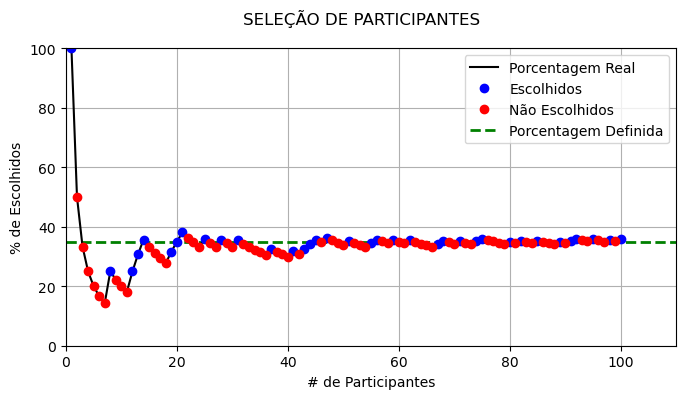

Total de participantes:  100 

Total de escolhidos:  36
Total de não escolhidos:  64
Porcentagem Definida:  35.0 %
Porcentagem Real:  36.0000 %

PESQUISA ENCERRADA


In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
import numpy as np
from scipy import stats

print ('SELEÇÃO DE PARTICIPANTES PARA PESQUISA POR PORCENTAGEM\n\n')

def is_numberF(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def is_numberI(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

porc = 2
while porc >= 1 or porc <= 0:
    porc = input('Porcentagem(%): ')
    clear_output(wait=False)
    if is_numberF(porc) == False:
        while is_numberF(porc) == False:
            print ('SELEÇÃO DE PARTICIPANTES PARA PESQUISA POR PORCENTAGEM\n\n')
            porc = input('Porcentagem(%): ')
            clear_output(wait=False)  
    porc = float(porc)/100
    if porc >= 1 or porc <= 0:
        print ('SELEÇÃO DE PARTICIPANTES PARA PESQUISA POR PORCENTAGEM\n\n')
        print ('Número inválido, tente novamente.')
clear_output(wait=False) 

acao = 'r'
i = -1
while acao.lower() != 's' and acao.lower() != 'i':
    print('Porcentagem de participantes definida: ', porc*100, '%')
    acao = input('Simular Grupo (S) | Selecionar Individualmente (I): ')
    if acao.lower() == 's':
        clear_output(wait=False)      
        while i < 0:
            print('Porcentagem de participantes definida: ', porc*100, '%')
            print('Simulação de Grupo')
            i = input('Número de participantes do grupo: ')
            clear_output(wait=False)
            while is_numberI(i) == False:
                print('Porcentagem de participantes definida: ', porc*100, '%')
                print('Simulação de Grupo')
                i = input('Número de participantes do grupo: ')
                clear_output(wait=False)
            i = int(i)
    elif acao.lower() != 'i':
        clear_output(wait=False)
    else:
        clear_output(wait=False)
        print('Porcentagem de participantes definida: ', porc*100, '%')
        print('Seleção individual')
        input("Aperte ENTER para começar a adicionar participantes...")
acao = acao.lower()   
clear_output(wait=False)  

z = stats.norm.ppf(porc)
resp = 'y'
xTEscol = []
yTEscol = []
xtesc = 0
xEscol = []
yEscol = []
xesc = 0
xNEscol = []
yNEscol = []
xnesc = 0

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(e/inch for e in tupl[0])
    else:
        return tuple(e/inch for e in tupl)

def graf():
    yamax = 100
    yamin = 0
    if porc*100 <= 50:
        if np.max(yTEscol) > porc*200:
            yamax = np.max(yTEscol)
        else:
            yamax = porc*200
    else:
        if np.min(yTEscol) < (porc*200-100):
            yamin = np.min(yTEscol)
        else:
            yamin = porc*200-100                
    fig(num=None, figsize=cm2inch(20, 10), dpi=100, facecolor='w', edgecolor='k')
    ax = plt.subplot(1,1,1)
    ax.plot(xTEscol, yTEscol,'k',label='Porcentagem Real')
    ax.plot(xEscol, yEscol, 'bo',label='Escolhidos')
    ax.plot(xNEscol, yNEscol, 'ro', label='Não Escolhidos')
    ax.hlines(y=porc*100, xmin=0, xmax=xtesc+10, linewidth=2, color='g', ls='--', label= 'Porcentagem Definida' )
    ax.legend(loc="best")
    ax.axis([0, xtesc+10, yamin, yamax])
    ax.grid(True)
    plt.xlabel('# de Participantes')
    plt.ylabel('% de Escolhidos')
    plt.suptitle('SELEÇÃO DE PARTICIPANTES')
    
    return plt.show()

while resp.lower() == 'y' or resp.lower() != 'n':
    if resp.lower() == 'y':
        if acao == 'i':
            print('Porcentagem de participantes a serem selecionados: ', porc*100, '%')
            print('z =','{:.4f}'.format(z),'\n')
        xtesc = xtesc + 1
        xTEscol.append([xtesc])
        mu, sigma = 0, 1
        s = np.random.normal(mu, sigma)
        if acao =='i':
            print(xtesc,'s =','{:.4f}'.format(s))       
        
        if s <= z:
            xesc = xesc+1
            xEscol.append([xtesc])
            yesc = (xesc/xtesc)*100
            yEscol.append([yesc])
            yTEscol.append([yesc])
            if acao == 'i':
                print ('Escolhido\n')            
        
        else:
            xnesc = xnesc+1
            xNEscol.append([xtesc])
            ynesc = ((xtesc-xnesc)/xtesc)*100
            yNEscol.append([ynesc])
            yTEscol.append([ynesc])
            if acao == 'i':
                print ('Não Escolhido\n')
   
        if acao =='i':
            graf()
            print ('Porcentagem Real Atual: ', '{:.4f}'.format((xesc/xtesc)*100), '%\n')
    else:
        print ('ação não definida\n')
    
    if acao == 's':   
        if i !=1:
            resp = 'y'
            i = i-1
        else:
            resp = 'n'
    
    else:
        resp = input('Adicionar novo participante? (y/n): ')
        clear_output(wait=False)    

else:
    print ('SELEÇÃO DE PARTICIPANTES PARA PESQUISA POR PORCENTAGEM')
    
    if acao == 's':
        print ('SIMULAÇÃO DE GRUPO')
    print('RESULTADO\n')
    
    graf()
    
    print ('Total de participantes: ', xtesc, '\n')
    print ('Total de escolhidos: ', xesc)
    #print ('Grupo de escolhidos: ', xEscol, '\n')
    print ('Total de não escolhidos: ', xnesc)
    #print ('Grupo de não escolhidos: ', xNEscol, '\n')
    print ('Porcentagem Definida: ',porc*100, '%')
    print ('Porcentagem Real: ', '{:.4f}'.format((xesc/xtesc)*100), '%\n')
    print('PESQUISA ENCERRADA')